In [1]:
from Ex8_Chiloiro_CODE_functions import *
import matplotlib.pyplot as plt

# RSRG

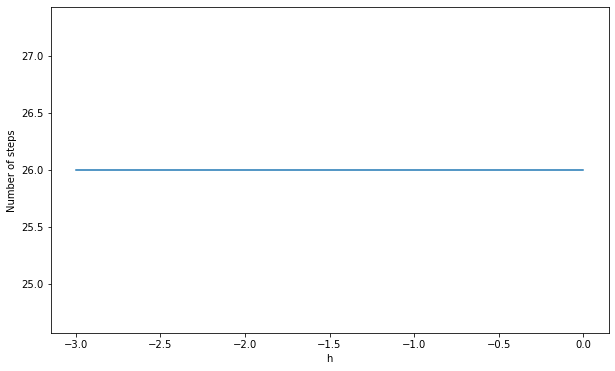

In [2]:
# plot the number of steps necessary to reach convergence as a function of h

N0 = 2
num_iter = 10**2
tol = 10**-8
h = np.linspace(0, -3, 50)
N = np.array([])
for h_i in h:
    _, N_i = RealSpaceRG(N0, num_iter, tol, QuantumIsingModel, h=h_i)
    N = np.append(N, len(N_i))

plt.figure(figsize=(10, 6))
plt.plot(h, N)
plt.xlabel('h')
plt.ylabel('Number of steps')
plt.show()

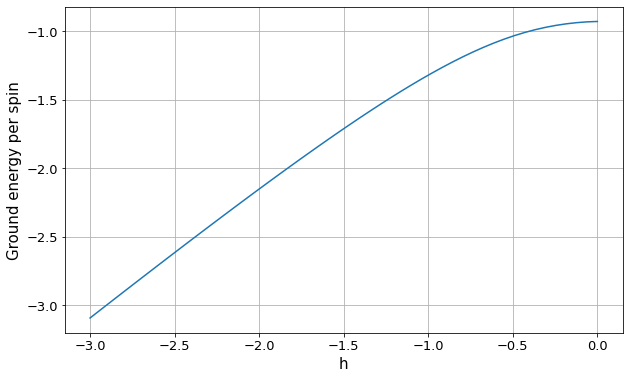

In [3]:
# plot the ground energy per spin as a function of h
N0 = 2
num_iter = 30
tol = 10**-8
h = np.linspace(0, -3, 50)
e = np.array([])
for h_i in h:
    e_i, N = RealSpaceRG(N0, num_iter, tol, QuantumIsingModel, h=h_i)
    e = np.append(e, e_i[-1])

plt.figure(figsize=(10, 6))
plt.plot(h, e)
plt.xlabel('h', fontsize=15)
plt.ylabel('Ground energy per spin', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# N scientific notation
#plt.title(f'N={N[-1]:.2e}, # iterations = {int(np.log2(N[-1])-1)}, tol={tol}')
plt.grid()

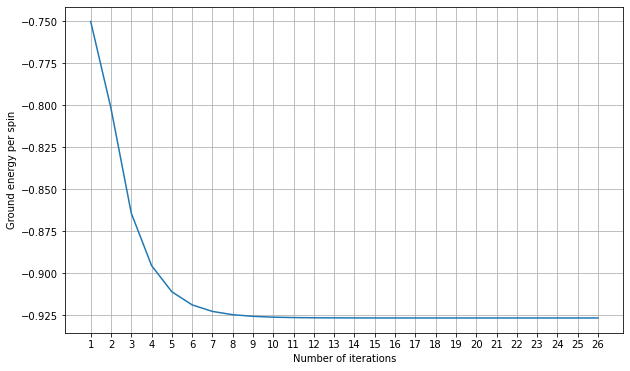

In [4]:
# plot the error of the RG transformation as a function of the number of the iteration
N0 = 2
h = -0.

num_iter = 30
tol = 10**-8
e, N = RealSpaceRG(N0, num_iter, tol, QuantumIsingModel, h=h)
err = [np.abs(e[i]-e[i+1]) for i in range(len(e)-1)]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(N)+1), e)
plt.xlabel('Number of iterations')
plt.ylabel('Ground energy per spin')
plt.xticks(np.arange(1, len(N)+1))
plt.grid();

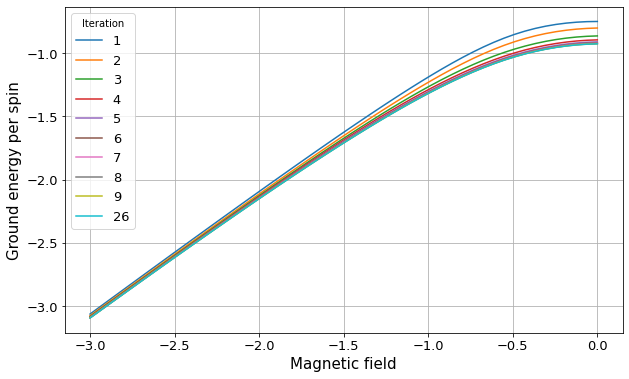

In [5]:
#plot the ground energy per spin as a function of the magnetic field, for different iterations of the RG transformation

N0 = 2
num_iter = np.arange(1, 10)
num_iter = np.append(num_iter, 26)
h = np.linspace(0, -3, 50)

e = np.zeros((len(num_iter), len(h)))
for i in range(len(num_iter)):
    for j in range(len(h)):
        e[i, j] = RealSpaceRG(N0, int(num_iter[i]), 10**-8, QuantumIsingModel,  h=h[j])[0][-1]
plt.figure(figsize=(10, 6))
for i in range(len(num_iter)):
    plt.plot(h, e[i, :], label='{}'.format(num_iter[i]))

plt.legend(title = 'Iteration', fontsize=13)
plt.xlabel('Magnetic field', fontsize=15)
plt.ylabel('Ground energy per spin', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid();

/home/marco/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


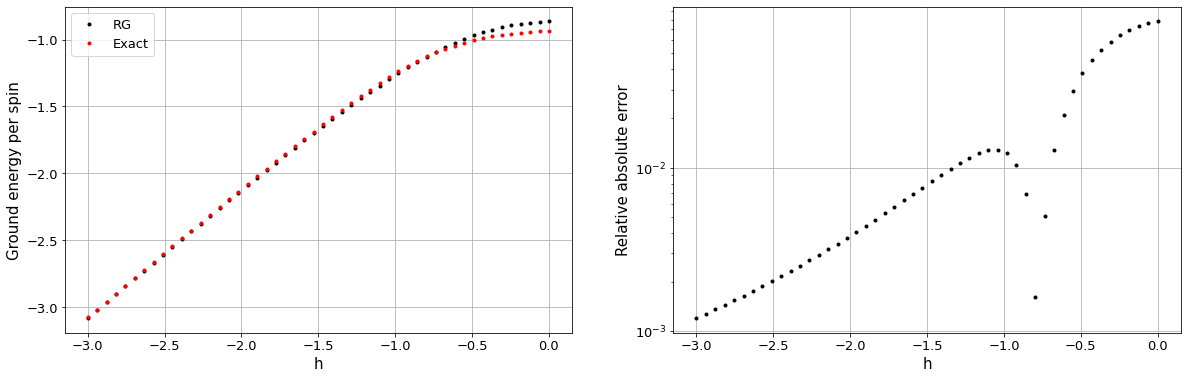

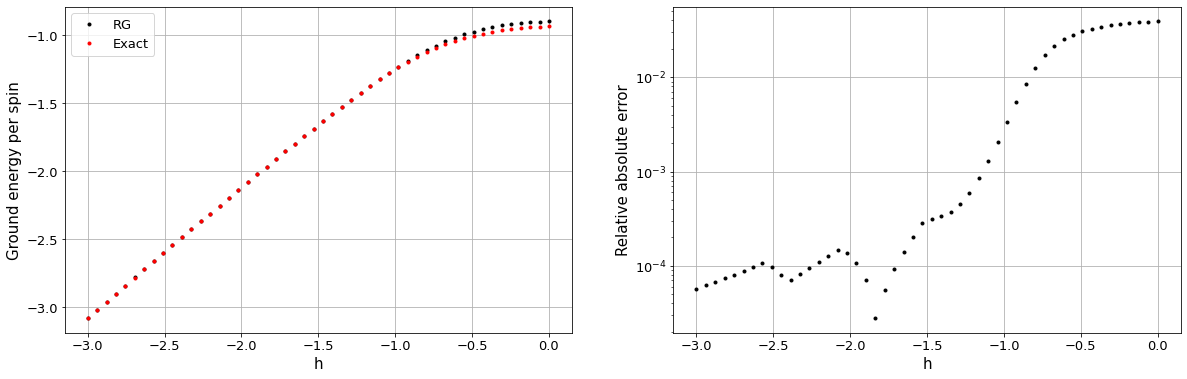

In [6]:
# comparison with exact solution 
N0 = 2
num_iter = 3

# plot (left: RG and exact, right: Relative absolute error)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
for h in np.linspace(-3, 0, 50):
    e, N = RealSpaceRG(N0, num_iter, 10**-8, QuantumIsingModel, h=h)
    e_real = eigs(QuantumIsingModel(N0*2**num_iter, h=h, dense=False), k=1, which='SR', return_eigenvectors=False)[0]/(N0*2**num_iter)
    if h == -3:
        ax1.plot(h, e[-1], '.', color='black', label='RG')
        ax1.plot(h, e_real, '.', color='red', label='Exact')
        ax2.semilogy(h, np.abs((e[-1]-e_real)/e_real), '.', color='black', label='RG')
    else:
        ax1.plot(h, e[-1], '.', color='black')
        ax1.plot(h, e_real, '.', color='red')
        ax2.semilogy(h, np.abs((e[-1]-e_real)/e_real), '.', color='black')
ax1.set_xlabel('h', fontsize=15)
ax1.set_ylabel('Ground energy per spin', fontsize=15)
ax2.set_xlabel('h', fontsize=15)
ax2.set_ylabel('Relative absolute error', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax2.xaxis.set_tick_params(labelsize=13)
ax2.yaxis.set_tick_params(labelsize=13)
ax1.grid()
ax2.grid()
ax1.legend(fontsize=13)

# comparison with exact solution 
N0 = 4
num_iter = 2

# plot (left: RG and exact, right: Relative absolute error)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
for h in np.linspace(-3, 0, 50):
    e, N = RealSpaceRG(N0, num_iter, 10**-8, QuantumIsingModel, h=h)
    e_real = eigs(QuantumIsingModel(N0*2**num_iter, h=h, dense=False), k=1, which='SR', return_eigenvectors=False)[0]/(N0*2**num_iter)
    if h == -3:
        ax1.plot(h, e[-1], '.', color='black', label='RG')
        ax1.plot(h, e_real, '.', color='red', label='Exact')
        ax2.semilogy(h, np.abs((e[-1]-e_real)/e_real), '.', color='black', label='RG')
    else:
        ax1.plot(h, e[-1], '.', color='black')
        ax1.plot(h, e_real, '.', color='red')
        ax2.semilogy(h, np.abs((e[-1]-e_real)/e_real), '.', color='black')
ax1.set_xlabel('h', fontsize=15)
ax1.set_ylabel('Ground energy per spin', fontsize=15)
ax2.set_xlabel('h', fontsize=15)
ax2.set_ylabel('Relative absolute error', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax2.xaxis.set_tick_params(labelsize=13)
ax2.yaxis.set_tick_params(labelsize=13)
ax1.grid()
ax2.grid()
ax1.legend(fontsize=13)

# DMRG

In [7]:
# Compute DMRG and RSMG 
h = np.linspace(0, -3, 50)
tol = 10**-8
max_iter = 10**6
N0 = 2

num_iter = np.array([])
N_vec = np.array([])
e_vec = np.array([])
mean_truncated_weight_vec = np.array([])
# RSMG
N_vec_RSMG = np.array([])
e_vec_RSMG = np.array([])

for h_i in h:
    e, N_i, truncated_weight = QIM_DMRG(h_i, tol=tol, max_num_steps=max_iter)
    num_iter = np.append(num_iter, len(N_i))
    N_vec = np.append(N_vec, N_i[-1])
    e_vec = np.append(e_vec, e[-1])
    mean_truncated_weight_vec = np.append(mean_truncated_weight_vec, np.mean(truncated_weight))

    e_RSMG, N_RSMG = RealSpaceRG(N0, max_iter, tol, QuantumIsingModel, h=h_i)
    N_vec_RSMG = np.append(N_vec_RSMG, N_RSMG[-1])
    e_vec_RSMG = np.append(e_vec_RSMG, e_RSMG[-1])

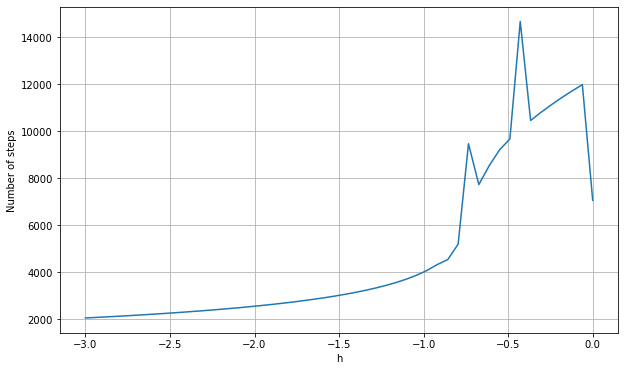

In [8]:
# plot the number of steps necessary to reach convergence as a function of h

plt.figure(figsize=(10, 6))
plt.plot(h, num_iter)
plt.xlabel('h')
plt.ylabel('Number of steps')
plt.grid()

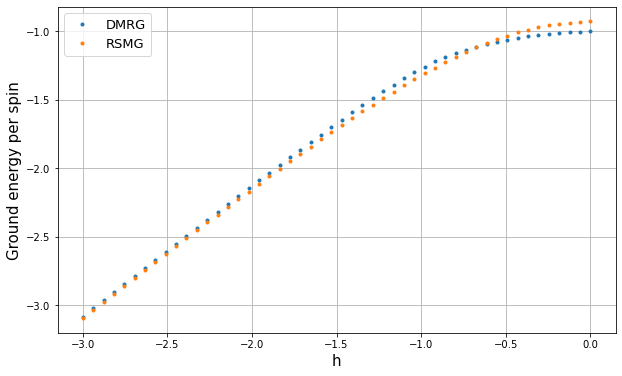

In [9]:
# Plot the found ground energy per site as a function of h and compare with RSMG
plt.figure(figsize=(10, 6))
plt.plot(h, e_vec, '.', label='DMRG')
plt.plot(h, e_vec_RSMG, '.', label='RSMG')
plt.xlabel('h', fontsize=15)
plt.ylabel('Ground energy per spin', fontsize=15)
plt.grid()
plt.legend(fontsize=13)

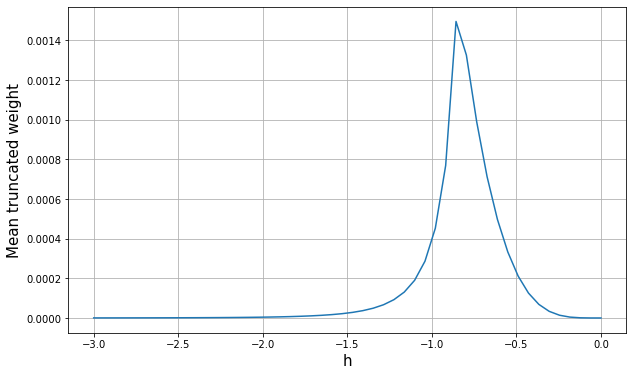

In [10]:
# mean truncated weight as a function of h
plt.figure(figsize=(10, 6))
plt.plot(h, mean_truncated_weight_vec)
plt.xlabel('h', fontsize=15)
plt.ylabel('Mean truncated weight', fontsize=15)
plt.grid()